In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

filename = 'protnet_coevo/dummy'

# Read entreis from zipped raw file

`coevo` is a list of lines that will be inserted under the \[COEVOLUTIONARY\] tag in the protiennet text file.

`coevo` should consist of flattened $21x21$ blocks for each upper triangular entry in an $lxl$ matrix where $l$ is the length of the sequence

In [3]:
with gzip.open(f'{filename}.raw.gz', 'rb') as f:
    line = ' '
    len_ = 0
    # the first lines are a pssm and end with '# 0 1' when the raw matrix starts
    while line != '':
        line = f.readline().decode()
        if line[0] == '#':
            break
        len_ += 1
    # number of entries to read (number of entries in an upper triangular matrix)
    num_entries = int(len_*(len_-1)/2)
    coevo = []
    for i in range(num_entries):
        block = np.zeros((21, 21))
        for i in range(21):
            line = f.readline().decode()
            block[i] = np.fromstring(line, sep='\t')
        coevo.append(np.reshape(block, (21**2,)))  # flatten the block
        f.readline()  # get rid of the next tag
coevo = np.array(coevo)
coevo.shape

(28, 441)

# Verify

(8, 8) <built-in function len>


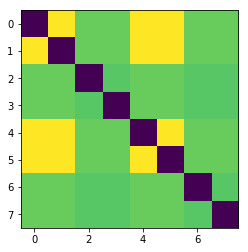

In [5]:
indices = np.triu_indices(len_, 1)
indices = list(zip(indices[0], indices[1]))
coevo_ = np.zeros((len_, len_, 21**2))
for k, i in enumerate(range(num_entries)):
    coevo_[indices[i]] = coevo[k]
coevo_ = coevo_ + np.transpose(coevo_, (1, 0, 2))
coevo_ = np.max(coevo_, axis=-1)
print(coevo_.shape, len)

plt.imshow(coevo_)

# Write to ptotnet txt file

Assumes that there is a protnet txt file with the file name `{filename}.txt`

In [6]:
with open(f'{filename}.txt', 'r') as f:
    lines = [line for line in f.readlines()]
landmarks = {line.strip(): i for i, line in enumerate(lines) if '[' in line}
landmarks

{'[ID]': 0,
 '[PRIMARY]': 2,
 '[EVOLUTIONARY]': 4,
 '[TERTIARY]': 26,
 '[MASK]': 30}

In [10]:
def np2str(arr):
    s = ''
    for i in range(arr.shape[0]):
        tmp = ''
        for j in range(arr.shape[1]):
            tmp += str(arr[i, j])
            tmp += '\t'
        s += tmp[:-1] + '\n'
    return s
with open(f'{filename}_w_coevo.txt', 'w') as f:
    f.writelines(lines[:landmarks['[TERTIARY]']])
    f.write('[COEVOLUTIONARY]\n')
    f.writelines(np2str(np.array(coevo)))
    f.writelines(lines[landmarks['[TERTIARY]']:])